## Classification

This type of classification problem where there are only two possible outputs is called binary classification. Where the word binary refers to there being only two possible classes or two possible categories. <br>
Negative or positive dont refer to 'bad' vs 'good'. They just present true false or 0,1. <br>
In first video its explained why we cant use linear regression models for classification.<br>
![Regression](Regression.png)
Now if we dont have extreme point wala example then blue regression line will be made. The blue vertical line is decision boundary. How is it made ? Suppose we set threshold value of 0.5 and everything above 0.5 means 1 and below 0.5 means 0. The threshold value corresponds to a point on regression line and os point par we vertical line that is decision boundary. So far decision boundary gives us right results. Everything on left of it is zero and right is 1. <br>
Now, we have new extreme point and hence regression line and decision boundary is shifted. Now according to what we did earliar that is right par 0 then our results come out to be wrong. and hence misclassification happens.

### Why cant we apply linear regression for Classification ?

In [52]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data
from plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./deeplearning.mplstyle')

In [54]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

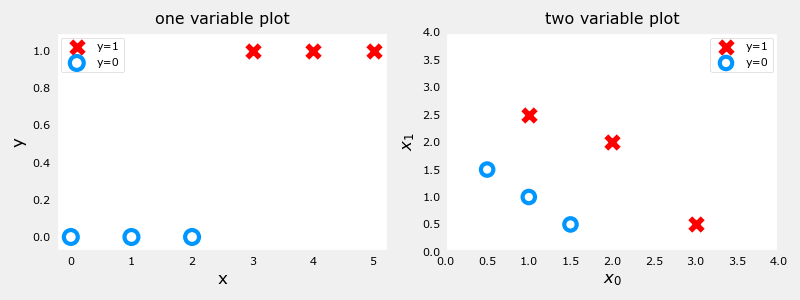

In [56]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
# s is each scatter point size
#edgecolor marker's border color
#lw is line width for hollow circle
#facecolor is color inside marker
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)
ax[0].set_ylim(-0.08,1.1) #range of y axis -.0.08 is minimum and 1.1 is maximum
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4]) #sets axis limits 
# x axis from 0 to 4 and y axis from 0 to 4
ax[1].set_ylabel('$x_1$', fontsize=12) #due to dollar sign, 1 will go in subscript of x
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

In the two-variable plot, the y axis is not available. Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.

## Linear Rregression Approach

The model will predict if a tumor is benign or malignant based on tumor size. <br>
- Click on 'Run Linear Regression' to find the best linear regression model for the given data. Note the resulting linear model does not match the data well. One option to improve the results is to apply a threshold.
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied. These predictions look good, the predictions match the data.
- Important: Now, add further 'malignant' data points on the far right, in the large tumor size range (near 10), and re-run linear regression.
- Now, the model predicts the larger tumor, but data point at x=3 is being incorrectly predicted!
- to clear/renew the plot, rerun the cell containing the plot command.

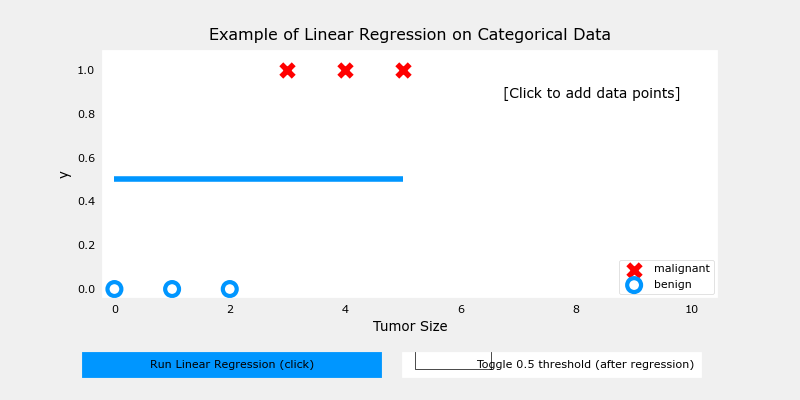

In [60]:
w_in = np.zeros((1)) #1D array created containg zeros
#shape will be (1,)
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False) 
#logistic false means logistic regression is not applied

The example above demonstrates that the linear model is insufficient to model categorical data. The model can be extended as described in the following lab.

## Logistic Regression

![Logistic Regression](Logistic.png) <br>
What logistic regression we end up doing is fit a curve that looks like this, S-shaped curve to this dataset. For this example, if a patient comes in with a tumor of this size, which I'm showing on the x-axis, then the algorithm will output 0.7 suggesting that is closer or maybe more likely to be malignant and benign. <br>
Sigmoid function <br>
![Sigmoid function](Sigmoid.png) <br>
Output values between 0 to 1. The function is denoted by the following formula.<br>
g(z) = 1/(1+e^(-z)) <br>
When z is large then function results output 1 and that can be seen from the formula.<br>
Linear regression model z = w.x + b then we pass the value of z into the g(z) function. The output will be between 0 to 1. Hence when we put these 2 together , we get model of logistic regression model of f(x).<br>
f(x) = g(w.x + b) <br>
The way I encourage you to think of logistic regressions output is to think of it as outputting the probability that the class or the label y will be equal to 1 given a certain input x. For example, in this application, where x is the tumor size and y is either 0 or 1, if you have a patient come in and she has a tumor of a certain size x, and if based on this input x, the model I'll plus 0.7, then what that means is that the model is predicting or the model thinks there's a 70 percent chance that the true label y would be equal to 1 for this patient.<br>

## Logistic Regression Implementation using Sigmoid function

In [25]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_one_addpt_onclick import plt_one_addpt_onclick
from lab_utils_common import draw_vthresh
plt.style.use('./deeplearning.mplstyle')
%matplotlib inline

### Sigmoid or Logistic Function

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.

- In the case of a single example, z is scalar.
- In the case of multiple examples, z may be a vector consisting of m values, one for each example.
- The implementation of the sigmoid function should cover both of these potential input formats. Let's implement this in Python.

In [29]:
#input is an array
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045


In [31]:
def sigmoid(z):
    '''
    Compute the sigmoid of z

    Args:
        z(ndarray): A scalar, numpy array of any size
    Returns:
        g(ndarray) : sigmoid(z), with the same shape as z
    '''

    g = 1/(1+np.exp(-z))
    return g

In [33]:
z_tmp  = np.arange(-10,11)

y = sigmoid(z_tmp)

np.set_printoptions(precision=2)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])
#np.c_[] creates an array where it concatenates z_tmp and y column wise 

Input (z), Output (sigmoid(z))
[[-1.00e+01  4.54e-05]
 [-9.00e+00  1.23e-04]
 [-8.00e+00  3.35e-04]
 [-7.00e+00  9.11e-04]
 [-6.00e+00  2.47e-03]
 [-5.00e+00  6.69e-03]
 [-4.00e+00  1.80e-02]
 [-3.00e+00  4.74e-02]
 [-2.00e+00  1.19e-01]
 [-1.00e+00  2.69e-01]
 [ 0.00e+00  5.00e-01]
 [ 1.00e+00  7.31e-01]
 [ 2.00e+00  8.81e-01]
 [ 3.00e+00  9.53e-01]
 [ 4.00e+00  9.82e-01]
 [ 5.00e+00  9.93e-01]
 [ 6.00e+00  9.98e-01]
 [ 7.00e+00  9.99e-01]
 [ 8.00e+00  1.00e+00]
 [ 9.00e+00  1.00e+00]
 [ 1.00e+01  1.00e+00]]


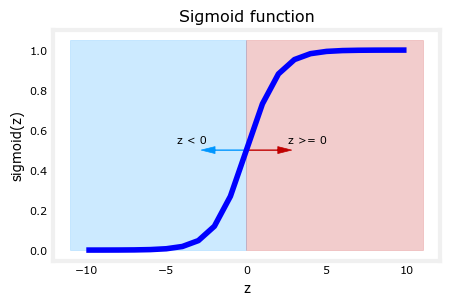

In [39]:
#the above output are between 0 to 1
#lets visualize them now
fig, ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp,y,c='b')

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0) #its a custom function

As u can see, the sigmoid function approaches 0 as z goes to large negative values and approaches 1 as z goes to large positive values

### Logistic Regression

In [43]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

Try doing the following steps
- Click on 'Run Logistic Regression' to find the best logistic regression model for the given training data.
- Note the resulting model fits the data quite well.
- Note, the orange line is z or w.x + b above. It does not match the line in a linear regression model. Further improve these results by applying a threshold. (The orange line is basically decision boundary where the linear regression line becomes 0).
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied
- These predictions look good. The predictions match the data
- Now, add further data points in the large tumor size range (near 10), and re-run logistic regression.
- unlike the linear regression model, this model continues to make correct predictions

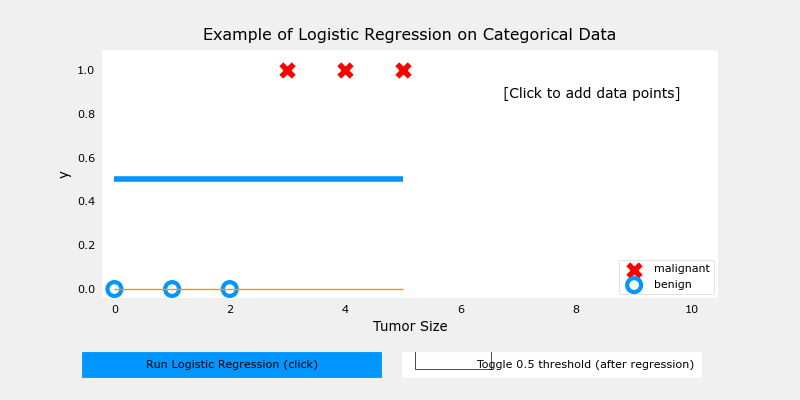

In [65]:
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)

## Decision Boundary

Now, what if you want to learn the algorithm to predict. Is the value of y going to be zero or one? Well, one thing you might do is set a threshold above which you predict y is one, or you set y hat prediction to be equal to one and below which you might say y hat prediction is going to be equal to zero. A common choice would be to pick a threshold of 0.5 so that if f(x) is greater than or equal to 0.5, then predict y is one. <br>
Hence, u see now when is f(x) greater than 0.5 ?<br>
That is when g(z) is greater than 0.5. <br>
That is when z is greater to or equal to 0. <br>
z is 0 or greater than it when w.x + b is equal to 0 or greater than it. <br>

Now Lets take classification problem where we have 2 features.<br>
We have to figure out when is z = w.x + b greater than 0 and when is it less than 0. <br>
To figure that out, there's a very interesting line to look at, which is when wx + b is exactly equal to 0. It turns out that this line is also called the decision boundary because that's the line where you're just almost neutral about whether y is 0 or y is 1.<br>
![Decision Boundary](Decision.png) <br>
now suppose w1=w2=1 and b=-3 in these example here. Hence for decision boundary z = w.x + b we will find a line i.e x1 + x2 = 3 here and when we draw this line then this line is decision boundary. Of course, if you had a different choice of the parameters, the decision boundary would be a different line. 

COMPLEX EXAMPLES WHERE DECISION BOUNDARY IS NO LONGER STRAIGHT LINE<br>
![Non Linear Decision Boundries](non.png) <br>
Earlier last week, you saw how to use polynomials in linear regression, and you can do the same in logistic regression. The equation x1^2 + x2^2 = 0 is the circle and hence if we have x1^2 + x2^2 >= 1 then y hat is 1 that is outside the circle.<br>
With more complex paramters we can get complex decision boundries like ellipse or random shapes. If we continue to use single power that is x1,x2,x3 then decision boundary continue to be a straight line. Also its not imp that the area inside shape is 0. It can be 1 as well.

## Decision Boundary Lab

In [6]:
import numpy as np
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, draw_vthresh
plt.style.use('./deeplearning.mplstyle')

In [8]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

Text(0.5, 0, '$x_0$')

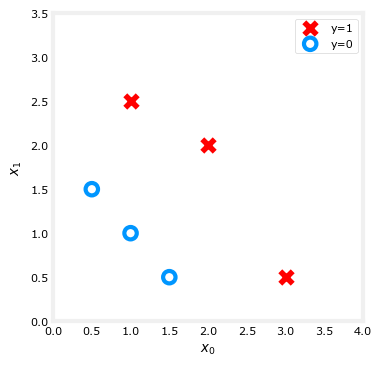

In [10]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')

### Logistic Regression Model

If f(x)>=0.5 then predict y=1 and simillarly f(x)<0.5 then predict y=0.Lets plot sigmoid function to see where g(z)>=0.5

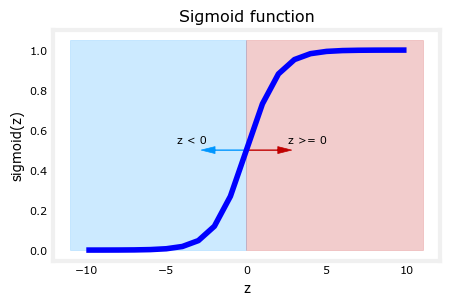

In [17]:
#plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z,sigmoid(z),c='b')

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

As we see g(z)>=0.5 for z>0 and hence w.x + b >=0 the model predicts y = 1 and simillarly w.x<0 ,model predicts y = 0

### Plotting Decision boundary

Suppose b=-3,w1=w2=1.Now f(x) = g(-3 + x0 + x1) <br> 
The model predicts y = 1 when -3 + x0 + x1 >=0 i.e x1 = 3 - x0

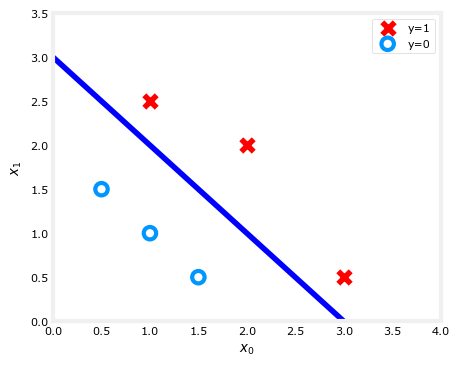

In [23]:
#choose values between 0 and 6
#no reason to choose values between 0 to 6 and just to get a clean plot
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1,c='b') #decision boundary
ax.axis([0,4,0,3.5])

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')

- In the plot above, the blue line represents the line x0+x1-3 = 0 and it should intercept the x1 axis at 3 and x0 axis at 3.
- niche wala region is -3+x0+x1<0.

## Cost function for logistic regression

Remember that the cost function gives you a way to measure how well a specific set of parameters fits the training data. Thereby gives you a way to try to choose better parameters. We'll look at how the squared error cost function is not an ideal cost function for logistic regression. We'll take a look at a different cost function that can help us choose better parameters for logistic regression. <br>
m is total number of traning examples.<br>
n is total number of features.<br>
If we use the same cost function from linear regression then the shape we get on plotting cost would be non convex shape. Here there would be alot of local minima.<br>
![Non Convex](non_convex.png) <br>
Instead, there will be a different cost function that can make the cost function convex again. The gradient descent can be guaranteed to converge to the global minimum. <br>
Now make loss function for logistic regression.We have the following loss function for linear regression. <br>
J(w,b) = (1/m)*summition from 1 to m of (1/2\*(f(x_i)-y_i)^2)<br>
Lets denote the term after summition by L i.e loss for single traning example as<br>
L(f(x_i),y_i)<br>
The defination of loss function we will use for logistic function is as follows. Remember, the loss function measures how well you're doing on one training example and is by summing up the losses on all of the training examples that you then get, the cost function, which measures how well you're doing on the entire training set.<br>
![Formula](formula.png)<br>
Now, f is the output of logistic regression. Thus, f is always between zero and one because the output of logistic regression is always between zero and one. So we will zoom in and only focus on part between 0 and 1 on f.<br>
Now if the algo predicts label as 1 and true label i.e y is 1 then loss is very small.Whereas in contrast, if the algorithm were to have outputs at 0.1 if it thinks that there is only a 10 percent chance of the tumor being malignant but y really is 1. If really is malignant, then the loss is this much higher value over here. <br>
![When y is zero](zero.png)<br>
Let's look at the second part of the loss function corresponding to when y is equal to 0. When f is 0 or very close to 0, the loss is also going to be very small which means that if the true label is 0 and the model's prediction is very close to 0, well, you nearly got it right so the loss is appropriately very close to 0. The larger the value of f of x gets, the bigger the loss because the prediction is further from the true label 0. In fact, as that prediction approaches 1, the loss actually approaches infinity.<br>
Going back to the tumor prediction example just says if the model predicts that the patient's tumor is almost certain to be malignant, say, 99.9 percent chance of malignancy, that turns out to actually not be malignant, so y equals 0 then we penalize the model with a very high loss.<br>

## Lab: Logistic Regresion,Logistic Loss

In [1]:
import numpy as np
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
plt.style.use('./deeplearning.mplstyle')

Recall, the squared error cost had the nice property that following the derivative of the cost leads to the minimum.

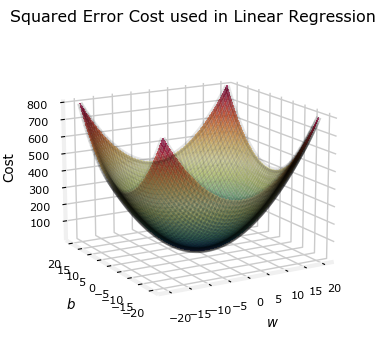

In [3]:
soup_bowl()

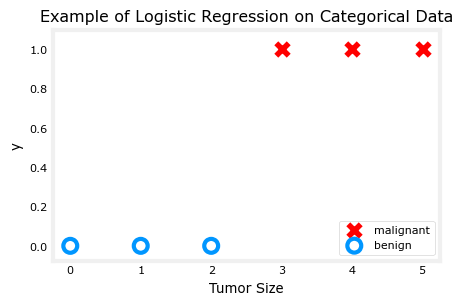

In [4]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
#longdouble gives 64 float
y_train = np.array([0, 0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

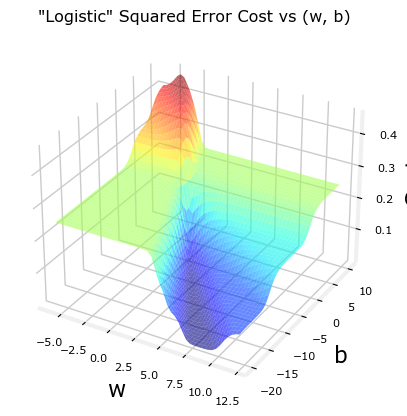

In [6]:
#now lets use sq mean function as cost function for logistic regression as well
plt.close('all')
plt_logistic_squared_error(x_train,y_train)

While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression.Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function. This is described below.

### Logistic loss function

Loss is a measure of the difference of a single example to its target value while the
Cost is a measure of the losses over the training set.<br>
The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or y=0 and another for when the target is one or y=1. Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

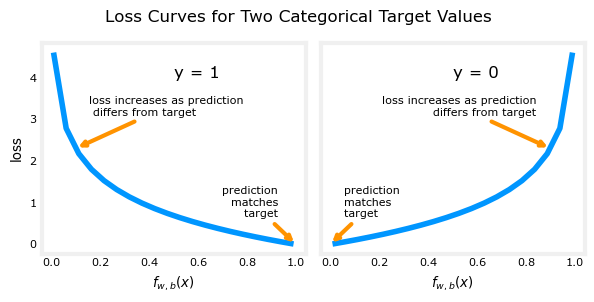

In [14]:
plt_two_logistic_loss_curves()

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is f(x) which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1. <br>
We can write the loss equation in the following form so that its easier to implement.<br>
`loss(f(x_i),y_i) = (-y_i*log(f(x_i))-(1-y_i)*log(1-f(x_i))`<br>
Now when y=0 then left hand side term is eliminated and we get simplified equation that we did earliar and same for y=1.

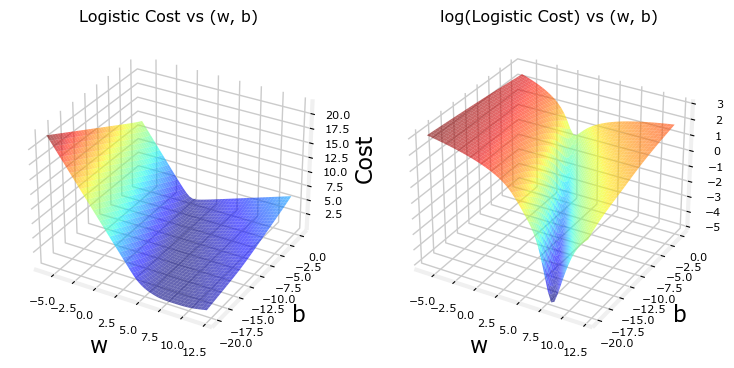

In [17]:
# let's take a look at the cost vs parameters curve for the simple example we considered above
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline.

## Simplified loss function

Loss function computes error for single traning example whereas cost function  is the average of the loss function over the entire training dataset. The following is easier form of writing the loss function.<br>
`loss(f(x_i),y_i) = (-y_i*log(f(x_i))-(1-y_i)*log(1-f(x_i))`<br>
Now when y=0 then left hand side term is eliminated and we get simplified equation that we did earliar and same for y=1.See the following slide.<br>
![loss](loss.png)<br>
Now the cost function becomes the following <br>
![Cost](cost.png)<br>
We got that this is perfect cost function for logistic regression from maximum likelihood estimation.

## Lab:Cost function for logistic regression

In [28]:
import numpy as np
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  plot_data, sigmoid, dlc
plt.style.use('./deeplearning.mplstyle')

In [30]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

Text(0.5, 0, '$x_0$')

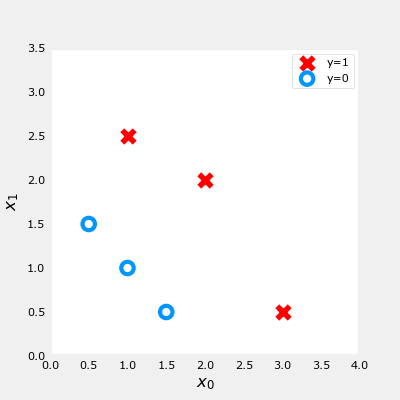

In [32]:
#we use helper function to plot this data
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)

![Cost function](function.png)

In [43]:
def compute_cost_logistic(X,y,w,b):
    '''
    Computes cost

    Returns:
        Cost(scalar)
    '''

    m=X.shape[0]
    cost=0.0
    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost/m
    return cost

In [45]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


Let's first plot the decision boundary for these two different b values to see which one fits the data better.<br>
- For b = -3,w0=1,w1=1 we will plot -3+x0+x1=0.
- For b = -4,w0=1,w0=1, we will plot  -4+x0+x1=0.

Text(0.5, 1.0, 'Decision Boundary')

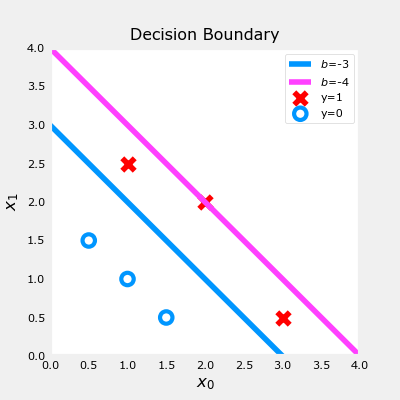

In [50]:
#choose the values between 0 to 6
x0=np.arange(0,6)

x1=3-x0
x1_other=4-x0

fig,ax= plt.subplots(1,1,figsize=(4,4))
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")

You can see from this plot that b = -4, w=np.array([1,1]) is a worse model for traning data.Lets see if the cost function implementation reflects this.

In [53]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


Hence cost for b = -4 is higher than cost for b = -3

## Gradient Descent Implementation

To fit the parameters of a logistic regression model, we're going to try to find the values of the parameters w and b that minimize the cost function J of w and b, and we'll again apply gradient descent to do this.The formula is given below.<br>
![Gradient Descent](gradient.png)<br>
When we talked about gradient descent for linear regression previously, you saw how you can monitor a gradient descent to make sure it converges. You can just apply the same method for logistic regression to make sure it also converges.Feature scaling applied the same way to scale the different features to take on similar ranges of values can also speed up gradient descent for logistic regression. A vectorized implementation refers to writing code that uses matrix and vector operations instead of explicit loops.<br>

## Lab: Gradient Descent Implementation

In [60]:
import copy,math
import numpy as np
%matplotlib widget
%matplotlib inline 
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [62]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

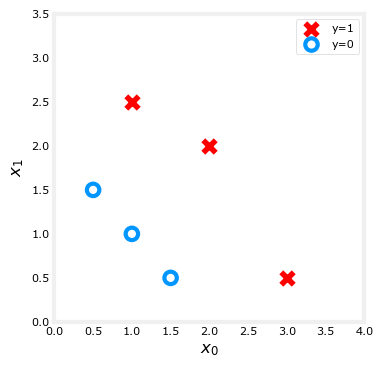

In [68]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [74]:
def compute_gradient_logistic(X,y,w,b):
    '''
    Computes the gradient for linear regression
    Returns:
        dj_dw 
        dj_db
    '''

    m,n = X.shape
    dj_dw  = np.zeros((n,)) #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db,dj_dw

In [76]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [80]:
def gradient_descent(X,y,w_in,b_in,alpha,num):
    '''
    Performs gradient descent
    Returns:
        w
        b
    '''

    J_hist = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i<100000:
            J_hist.append(compute_cost_logistic(X,y,w,b))

        if i%math.ceil(num/10) == 0:
            print(f'iteration{i:4d}:Cost {J_hist[-1]}')

    return w,b,J_hist

In [84]:
w_tmp = np.zeros_like(X_train[0]) #1st example would have 2 features and from there we get size of w to be (2,)
b_tmp = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

iteration   0:Cost 0.684610468560574
iteration1000:Cost 0.1590977666870457
iteration2000:Cost 0.08460064176930078
iteration3000:Cost 0.05705327279402531
iteration4000:Cost 0.04290759421682
iteration5000:Cost 0.03433847729884557
iteration6000:Cost 0.02860379802212006
iteration7000:Cost 0.02450156960879306
iteration8000:Cost 0.02142370332569295
iteration9000:Cost 0.019030137124109114

updated parameters: w:[5.28 5.08], b:-14.222409982019837


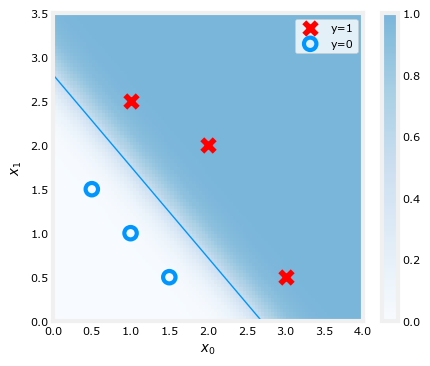

In [112]:
#Lets plot the results of gradient descent

fig,ax = plt.subplots(1,1,figsize=(5,4))
#plot the probability
plt_prob(ax,w_out,b_out) #draws the contour plot in the graph

# Plot the original data
ax.set_ylabel(r'$x_1$') #by using r' the underscore would mean subscript
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax) #plotted negative and positive examples

# Plot the decision boundary
# w0x0 + w1x1 + b = 0
# for getting the decision boundary we put
# x0 = 0 then x1 = -b/w1
# x1 = 0 then x0 = -b/w0
# so we are plotting (0,x1) to (x0,0)
x0 = -b_out/w_out[0] 
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)

The decision boundary is the line at whcih the probability = 0.5

### Another dataset

Let's return to a one-variable data set. With just two parameters, w and b, it is possible to plot the cost function using a contour plot to get a better idea of what gradient descent is up to.

In [116]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

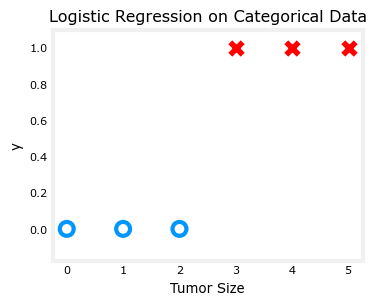

In [118]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train, y_train, ax) #helper function to plot this data

In the plot below, try the following:
- changing w and b by clicking within the contour plot on the upper right.
- Note the changing value of cost on upper left plot.
- Note the cost is accumulated by a loss on each example (vertical dotted lines)
- Run the gradient descent by clicking the orange button.
- note the steadily decreasing cost (contour and cost plot are in log(cost).
- clicking in the contour plot will reset the model for a new run.

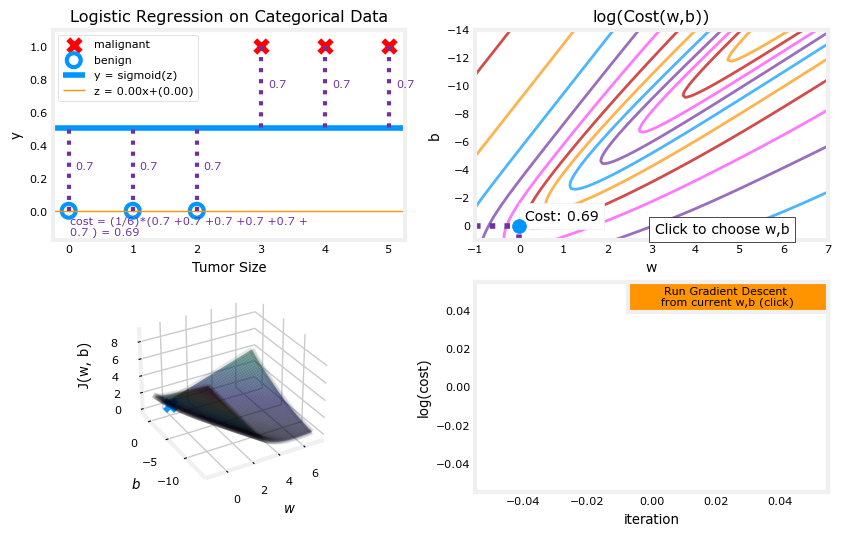

In [121]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic(x_train, y_train, w_range, b_range)

- Visualize how cost changes as w and b vary.
- See where of minimum of cost lies.
- Understand shape of loss surface.

### Logistic Regression using Scikit-Learn

In [125]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

#### Fit the model

The code below imports the logistic regression model from scikit-learn. You can fit this model on the training data by calling fit function.

In [128]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X,y)

LogisticRegression()

#### Make Predictions

You can see the predictions made by this model by calling the predict function.

In [133]:
y_pred = lr_model.predict(X)
print("Prediction on the training set:",y_pred)

Prediction on the training set: [0 0 0 1 1 1]


#### Calculate Accuracy

You can calculate accuracy of this model by calling score function

In [136]:
print("Accuracy on traning set:",lr_model.score(X,y))

Accuracy on traning set: 1.0
